#**Main Findings**

**Rivers:**

>* Over the four biennial lists, we identified 551 impaired river segments, each with its unique identification number. This group includes 482 permanently listed river segments. In addition, 38 segments are listed in three lists, 17 in two lists, and 45 segments appear only once.


**Top 5 most common impairments from 2018 to 2024 for rivers**
> *Bacteria: Indicator Bacteria- E. coli

>*Biological: low aquatic macroinvertebrate IBI

>*Biological: low fish & invert IBIs- cause unknown

>*Fish Consumption Advisory: Mercury

>*Biological: low fish IBI


**Most frequent uses of rivers affected by impairment across all cycles:**

>*Recreation: Primary contact      

>*Aquatic Life: Warm Water Type 2    

>*Aquatic Life: Warm Water Type 1    

>*Human Health                        

*Aquatic Life: Cold Water Type 1     

>*Recreation: Secondary contact       

>*General Use water                   

>*Recreation: Children's contact

**Lakes**

*From 2018 to 2024, Iowa identified 120 impaired lakes. Of these, 59 appeared impaired in four consecutive assessments, 21 in three, 18 in two, and 22 were listed only once.

**Top 5 most common impairments from 2018 to 2024 for lakes:**
*Algal Growth: Chlorophyll a

>*pH

>*Bacteria: Indicator Bacteria- E. coli

>*Fish Consumption Advisory: Mercury

>*Organic Enrichment: Low Dissolved Oxygen



#**Import**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import re
import plotly.express as px

###**Connecting to Drive**

In [ ]:
#Connection to the drive
# https://colab.research.google.com/drive/1MrkeNCx0gMZo5OQc1fCWEbi-m8PMU-aA#scrollTo=eor2d3XK2Zbe
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Import df_combined6 (List of water body impairmens from 2018 to 2024)**

In [ ]:
# Import the 2018 impaired waters data from a CSV file into a DataFrame
df_combined6 = pd.read_csv('/content/drive/MyDrive/water_impared/df_combined6.csv')

#**Questions to the data**

###**How many unique impaired water body segments (“SegIDs”) have been recorded from 2018 to 2024?**

In [ ]:
unique_segids_count = df_combined6['SegID'].nunique()
print(f"Number of unique SegIDs in the database: {unique_segids_count}")


Number of unique SegIDs in the database: 683


###**How many segments of impaired water bodies (SegID) have been recorded per year?**


In [ ]:
# Group by 'cycle' and count unique 'SegID' values for each year
unique_segids_per_year = df_combined6.groupby('cycle')['SegID'].nunique().reset_index()

# Rename columns for clarity
unique_segids_per_year.rename(columns={'SegID': 'Unique SegIDs'}, inplace=True)

# Print the result to see the number of unique water body segments listed as impaired each year
print(unique_segids_per_year)

   cycle  Unique SegIDs
0   2018            622
1   2020            585
2   2022            597
3   2024            577


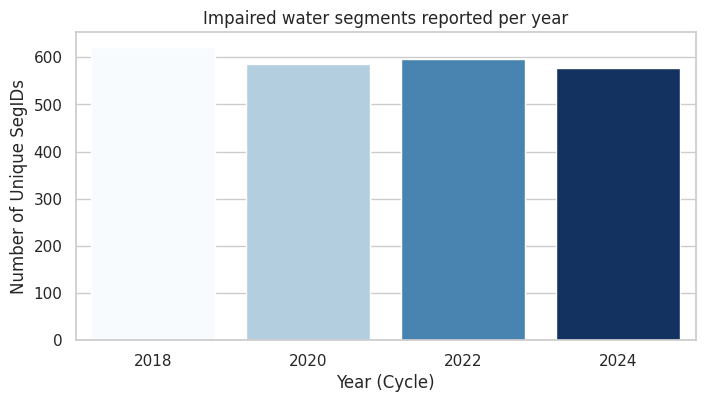

In [ ]:
# Set the visual style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x='cycle', y='Unique SegIDs',hue='cycle', data=unique_segids_per_year, palette="Blues", dodge=False)
plt.legend().remove()

# Adding titles and labels
plt.title('Impaired water segments reported per year')
plt.xlabel('Year (Cycle)')
plt.ylabel('Number of Unique SegIDs')

# Show the plot
plt.show()

###**How many types of impaired water body segments have been detected per year?**

In [ ]:
# Group by 'cycle' (year) and 'type', then count unique 'SegID'
unique_segids_per_year_type = df_combined6.groupby(['cycle', 'type'])['SegID'].nunique().reset_index()

# Rename the columns for clarity
unique_segids_per_year_type.columns = ['Year', 'Type', 'Unique SegID Count']

# Print the resulting DataFrame
"Number of unique SegIDs per year and type:"
unique_segids_per_year_type

,Year,Type,Unique SegID Count
0,2018,Lake,92
1,2018,Reservoir,7
2,2018,River,521
3,2018,Wetland,2
4,2020,Lake,88
5,2020,Reservoir,3
6,2020,River,492
7,2020,Wetland,2
8,2022,Lake,88
9,2022,Reservoir,3


### **To calculate the required statistics for type of water body, specifically focusing on:**
>* Total number of unique SegIDs
>* Percentage representation of each type of the total SegIDs
>* Average and median number of unique SegIDs

In [ ]:
# Group by 'type', then count unique 'SegID' across all cycles
segids_by_type = df_combined6.groupby('type')['SegID'].nunique().reset_index()
segids_by_type.columns = ['Type', 'Unique SegID Count']

# Calculate the total unique SegIDs across all types and cycles for normalization
total_segids = segids_by_type['Unique SegID Count'].sum()

# Calculate the percentage of each type over all cycles
segids_by_type['Percentage'] = (segids_by_type['Unique SegID Count'] / total_segids * 100).round(2)
segids_by_type['Percentage'] = segids_by_type['Percentage'].astype(str) + '%'

# To compute average and median, first get counts of 'SegID' per type per cycle
segids_per_type_per_cycle = df_combined6.groupby(['type', 'cycle'])['SegID'].nunique().reset_index()

# Calculate average and median unique SegIDs across all cycles for each type
average_per_type = segids_per_type_per_cycle.groupby('type')['SegID'].mean().reset_index()
average_per_type.columns = ['Type', 'Average Unique SegIDs']

median_per_type = segids_per_type_per_cycle.groupby('type')['SegID'].median().reset_index()
median_per_type.columns = ['Type', 'Median Unique SegIDs']

# Merge the average and median data back to the main type DataFrame
segids_by_type = segids_by_type.merge(average_per_type, on='Type').merge(median_per_type, on='Type')

# Print the final DataFrame with all statistics
print("Statistics by Type Across All Cycles:")
segids_by_type

Statistics by Type Across All Cycles:


,Type,Unique SegID Count,Percentage,Average Unique SegIDs,Median Unique SegIDs
0,Lake,120,17.57%,89.25,88.5
1,Reservoir,7,1.02%,4.00,3.0
2,River,551,80.67%,499.25,497.0
3,Wetland,5,0.73%,2.75,2.5


### **To calculate the required statistics for the year 2018, specifically focusing on:**
>* Total number of unique SegIDs by type for 2018.
>* Percentage representation of each type of the total SegIDs for 2018.
>* Average and median number of unique SegIDs for 2018 across all types.


In [ ]:
# Filter the data for the year 2018
data_2018 = df_combined6[df_combined6['cycle'] == 2018]

In [ ]:
# Group by 'type' and count unique 'SegID'
segids_by_type_2018 = data_2018.groupby('type')['SegID'].nunique().reset_index()
segids_by_type_2018.columns = ['Type', 'Unique SegID Count']


In [ ]:
# Calculate total unique SegIDs in 2018 for normalization
total_segids_2018 = segids_by_type_2018['Unique SegID Count'].sum()

In [ ]:
# Calculate the percentage of each type and round to 2 decimal places
segids_by_type_2018['Percentage'] = ((segids_by_type_2018['Unique SegID Count'] / total_segids_2018) * 100).round(2)


In [ ]:
# Add '%' to the percentages for display purposes
segids_by_type_2018['Percentage'] = segids_by_type_2018['Percentage'].astype(str) + '%'


In [ ]:
# Calculate the average and median for all types in 2018
average_segids_2018 = segids_by_type_2018['Unique SegID Count'].mean()
median_segids_2018 = segids_by_type_2018['Unique SegID Count'].median()


In [ ]:
# Print the detailed statistics for each type
print("Detailed Statistics by Type for 2018:")
print(segids_by_type_2018)
print("\nAverage number of unique SegIDs for 2018 across all types:", average_segids_2018)
print("Median number of unique SegIDs for 2018 across all types:", median_segids_2018)

Detailed Statistics by Type for 2018:
        Type  Unique SegID Count Percentage
0       Lake                  92     14.79%
1  Reservoir                   7      1.13%
2      River                 521     83.76%
3    Wetland                   2      0.32%

Average number of unique SegIDs for 2018 across all types: 155.5
Median number of unique SegIDs for 2018 across all types: 49.5


### **To calculate the required statistics for the year 2020, specifically focusing on:**
>* Total number of unique SegIDs by type for 2020
.
>* Percentage representation of each type of the total SegIDs for 2020
.
>* Average and median number of unique SegIDs for 2020
 across all types.

In [ ]:
# Filter the data for the year 2020
data_2020 = df_combined6[df_combined6['cycle'] == 2020]

# Group by 'type' and count unique 'SegID'
segids_by_type_2020 = data_2020.groupby('type')['SegID'].nunique().reset_index()
segids_by_type_2020.columns = ['Type', 'Unique SegID Count']

# Calculate total unique SegIDs in 2020 for normalization
total_segids_2020 = segids_by_type_2020['Unique SegID Count'].sum()

# Calculate the percentage of each type and round to 2 decimal places
segids_by_type_2020['Percentage'] = ((segids_by_type_2020['Unique SegID Count'] / total_segids_2020) * 100).round(2)

# Add '%' to the percentages for display purposes
segids_by_type_2020['Percentage'] = segids_by_type_2020['Percentage'].astype(str) + '%'

# Calculate the average and median for all types in 2020
average_segids_2020 = segids_by_type_2020['Unique SegID Count'].mean()
median_segids_2020 = segids_by_type_2020['Unique SegID Count'].median()

# Print the detailed statistics for each type
print("Detailed Statistics by Type for 2020:")
print(segids_by_type_2020)
print("\nAverage number of unique SegIDs for 2020 across all types:", average_segids_2020)
print("Median number of unique SegIDs for 2020 across all types:", median_segids_2020)


Detailed Statistics by Type for 2020:
        Type  Unique SegID Count Percentage
0       Lake                  88     15.04%
1  Reservoir                   3      0.51%
2      River                 492      84.1%
3    Wetland                   2      0.34%

Average number of unique SegIDs for 2020 across all types: 146.25
Median number of unique SegIDs for 2020 across all types: 45.5


### **To calculate the required statistics for the year 2022, specifically focusing on:**
>* Total number of unique SegIDs by type for 2022.
>* Percentage representation of each type of the total SegIDs for 2022.
>* Average and median number of unique SegIDs for 2022 across all types.

In [ ]:
# Filter the data for the year 2022
data_2022 = df_combined6[df_combined6['cycle'] == 2022]

# Group by 'type' and count unique 'SegID'
segids_by_type_2022 = data_2022.groupby('type')['SegID'].nunique().reset_index()
segids_by_type_2022.columns = ['Type', 'Unique SegID Count']

# Calculate total unique SegIDs in 2022 for normalization
total_segids_2022 = segids_by_type_2022['Unique SegID Count'].sum()

# Calculate the percentage of each type and round to 2 decimal places
segids_by_type_2022['Percentage'] = ((segids_by_type_2022['Unique SegID Count'] / total_segids_2022) * 100).round(2)

# Add '%' to the percentages for display purposes
segids_by_type_2022['Percentage'] = segids_by_type_2022['Percentage'].astype(str) + '%'

# Calculate the average and median for all types in 2022
average_segids_2022 = segids_by_type_2022['Unique SegID Count'].mean()
median_segids_2022 = segids_by_type_2022['Unique SegID Count'].median()

# Print the detailed statistics for each type
print("Detailed Statistics by Type for 2022:")
print(segids_by_type_2022)
print("\nAverage number of unique SegIDs for 2022 across all types:", average_segids_2022)
print("Median number of unique SegIDs for 2022 across all types:", median_segids_2022)


Detailed Statistics by Type for 2022:
        Type  Unique SegID Count Percentage
0       Lake                  88     14.74%
1  Reservoir                   3       0.5%
2      River                 502     84.09%
3    Wetland                   4      0.67%

Average number of unique SegIDs for 2022 across all types: 149.25
Median number of unique SegIDs for 2022 across all types: 46.0


### **To calculate the required statistics for the year 2024, specifically focusing on:**
>* Total number of unique SegIDs by type for 2024
.
>* Percentage representation of each type of the total SegIDs for 2024
.
>* Average and median number of unique SegIDs for 2024
 across all types.

In [ ]:
# Filter the data for the year 2024
data_2024 = df_combined6[df_combined6['cycle'] == 2024]

# Group by 'type' and count unique 'SegID'
segids_by_type_2024 = data_2024.groupby('type')['SegID'].nunique().reset_index()
segids_by_type_2024.columns = ['Type', 'Unique SegID Count']

# Calculate total unique SegIDs in 2024 for normalization
total_segids_2024 = segids_by_type_2024['Unique SegID Count'].sum()

# Calculate the percentage of each type and round to 2 decimal places
segids_by_type_2024['Percentage'] = ((segids_by_type_2024['Unique SegID Count'] / total_segids_2024) * 100).round(2)

# Add '%' to the percentages for display purposes
segids_by_type_2024['Percentage'] = segids_by_type_2024['Percentage'].astype(str) + '%'

# Calculate the average and median for all types in 2024
average_segids_2024 = segids_by_type_2024['Unique SegID Count'].mean()
median_segids_2024 = segids_by_type_2024['Unique SegID Count'].median()

# Print the detailed statistics for each type
print("Detailed Statistics by Type for 2024:")
print(segids_by_type_2024)
print("\nAverage number of unique SegIDs for 2024 across all types:", average_segids_2024)
print("Median number of unique SegIDs for 2024 across all types:", median_segids_2024)


Detailed Statistics by Type for 2024:
        Type  Unique SegID Count Percentage
0       Lake                  89     15.42%
1  Reservoir                   3      0.52%
2      River                 482     83.54%
3    Wetland                   3      0.52%

Average number of unique SegIDs for 2024 across all types: 144.25
Median number of unique SegIDs for 2024 across all types: 46.0


###**How frequently do unique segment identifiers (SegIDs) appear across the water-impaired lists from 2018 to 2024?**

In [ ]:
# Group by 'SegID' and count the number of unique 'cycle' values for each SegID
segid_cycle_counts = df_combined6.groupby('SegID')['cycle'].nunique().reset_index()

In [ ]:
# Rename the columns
segid_cycle_counts.columns = ['SegID', 'Unique Cycle Count']

In [ ]:
# Count how many SegIDs appear in exactly 1, 2, 3, and 4 cycles
frequency_of_appearance = segid_cycle_counts['Unique Cycle Count'].value_counts().sort_index()

In [ ]:
# Print the results
frequency_of_appearance

Unique Cycle Count
1     73
2     36
3     60
4    514
Name: count, dtype: int64

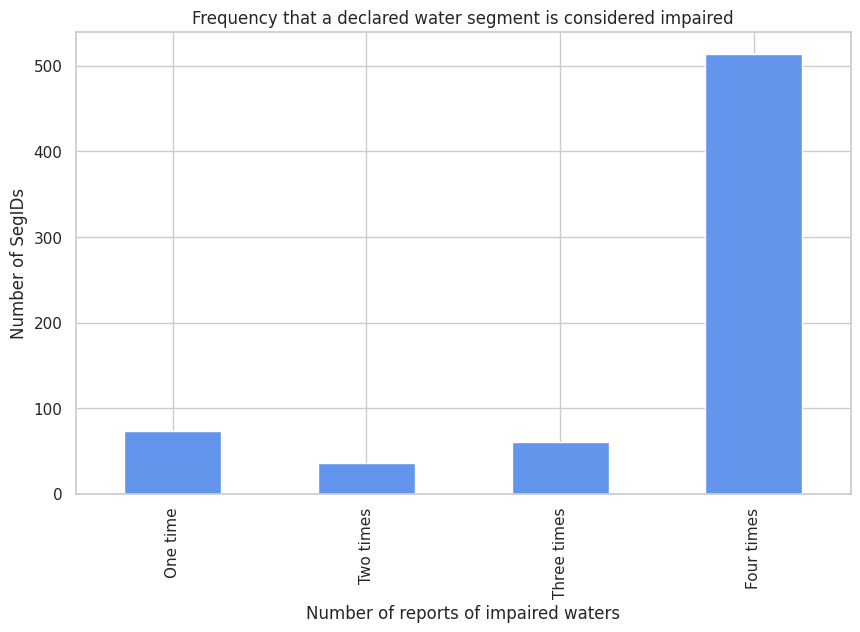

In [ ]:
# Create a bar chart
frequency_of_appearance.plot(kind='bar', color='#6495ed', figsize=(10, 6))
plt.title('Frequency that a declared water segment is considered impaired')
plt.xlabel('Number of reports of impaired waters')
plt.ylabel('Number of SegIDs')

# Update x-axis tick labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['One time', 'Two times', 'Three times', 'Four times'])

plt.show()


###**How many segments (single SegID) overlap between the 2018 and 2020 cycles?**

In [ ]:
# Extract SegIDs for 2018 and 2020 cycles
seg_ids_2018 = set(df_combined6[df_combined6['cycle'] == 2018]['SegID'])
seg_ids_2020 = set(df_combined6[df_combined6['cycle'] == 2020]['SegID'])

# Print the number of unique SegIDs in each cycle
print("Number of unique SegIDs in 2018:", len(seg_ids_2018))
print("Number of unique SegIDs in 2020:", len(seg_ids_2020))


Number of unique SegIDs in 2018: 622
Number of unique SegIDs in 2020: 585


In [ ]:
# SegIDs in 2018 but not in 2020
unique_to_2018 = seg_ids_2018.difference(seg_ids_2020)
print("Number of SegIDs in 2018 but not in 2020:", len(unique_to_2018))

# SegIDs in 2020 but not in 2018
unique_to_2020 = seg_ids_2020.difference(seg_ids_2018)
print("Number of SegIDs in 2020 but not in 2018:", len(unique_to_2020))


Number of SegIDs in 2018 but not in 2020: 52
Number of SegIDs in 2020 but not in 2018: 15


In [ ]:
# SegIDs common to both 2018 and 2020
common_seg_ids = seg_ids_2018.intersection(seg_ids_2020)
print("Number of SegIDs common to both 2018 and 2020:", len(common_seg_ids))


Number of SegIDs common to both 2018 and 2020: 570


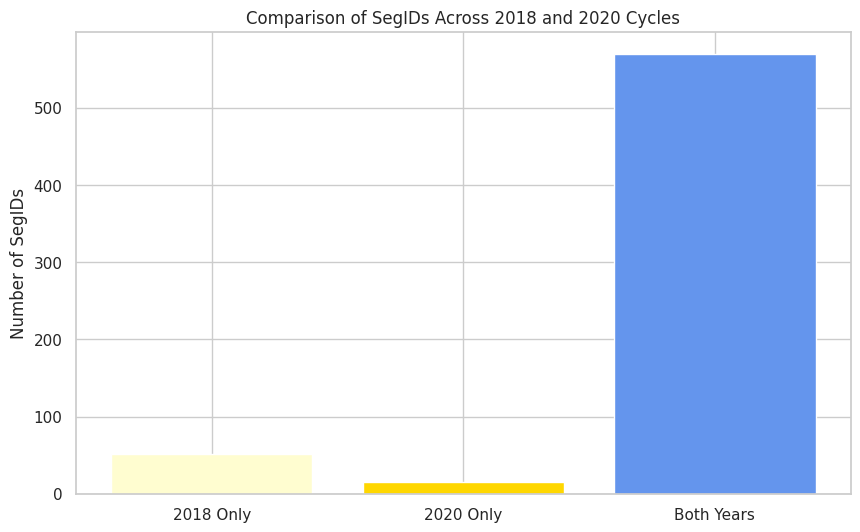

In [ ]:
import matplotlib.pyplot as plt

# Data preparation for visualization
data = {
    '2018 Only': len(unique_to_2018),
    '2020 Only': len(unique_to_2020),
    'Both Years': len(common_seg_ids)
}

# Create a bar chart with updated data
plt.figure(figsize=(10, 6))
colors = ['#FFFDD0', '#FFD700', '#6495ed']
plt.bar(data.keys(), data.values(), color=colors)
plt.title('Comparison of SegIDs Across 2018 and 2020 Cycles')
plt.ylabel('Number of SegIDs')
plt.show()


###**How many segments (single SegID) overlap between the 2020 and 2022 cycles?**

In [ ]:
# Extract SegIDs for 2020 and 2022 cycles
seg_ids_2020 = set(df_combined6[df_combined6['cycle'] == 2020]['SegID'])
seg_ids_2022 = set(df_combined6[df_combined6['cycle'] == 2022]['SegID'])

# Print the number of unique SegIDs in each cycle
print("Number of unique SegIDs in 2020:", len(seg_ids_2020))
print("Number of unique SegIDs in 2022:", len(seg_ids_2022))


Number of unique SegIDs in 2020: 585
Number of unique SegIDs in 2022: 597


In [ ]:
# SegIDs in 2020 but not in 2022
unique_to_2020 = seg_ids_2020.difference(seg_ids_2022)
print("Number of SegIDs in 2020 but not in 2022:", len(unique_to_2020))

# SegIDs in 2022 but not in 2020
unique_to_2022 = seg_ids_2022.difference(seg_ids_2020)
print("Number of SegIDs in 2022 but not in 2020:", len(unique_to_2022))

# SegIDs common to both 2020 and 2022
common_seg_ids = seg_ids_2020.intersection(seg_ids_2022)
print("Number of SegIDs common to both 2020 and 2022:", len(common_seg_ids))


Number of SegIDs in 2020 but not in 2022: 15
Number of SegIDs in 2022 but not in 2020: 27
Number of SegIDs common to both 2020 and 2022: 570


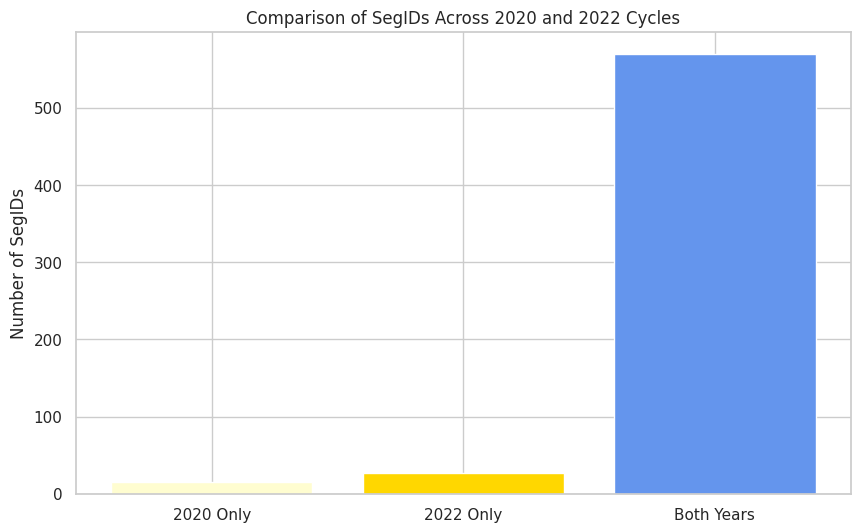

In [ ]:
# Data preparation for visualization
data = {
    '2020 Only': len(unique_to_2020),
    '2022 Only': len(unique_to_2022),
    'Both Years': len(common_seg_ids)
}

# Define a list of blue colors using hex codes for more variety
colors = ['#FFFDD0', '#FFD700', '#6495ed']

# Create a bar chart with custom blue colors
plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color=colors)
plt.title('Comparison of SegIDs Across 2020 and 2022 Cycles')
plt.ylabel('Number of SegIDs')
plt.show()


###**How many segments (single SegID) overlap between the 2022 and 2024 cycles?**

In [ ]:
# Extract SegIDs for 2022 and 2024 cycles
seg_ids_2022 = set(df_combined6[df_combined6['cycle'] == 2022]['SegID'])
seg_ids_2024 = set(df_combined6[df_combined6['cycle'] == 2024]['SegID'])

# Print the number of unique SegIDs in each cycle
print("Number of unique SegIDs in 2022:", len(seg_ids_2022))
print("Number of unique SegIDs in 2024:", len(seg_ids_2024))


Number of unique SegIDs in 2022: 597
Number of unique SegIDs in 2024: 577


In [ ]:
# SegIDs in 2022 but not in 2024
unique_to_2022 = seg_ids_2022.difference(seg_ids_2024)
print("Number of SegIDs in 2022 but not in 2024:", len(unique_to_2022))

# SegIDs in 2024 but not in 2022
unique_to_2024 = seg_ids_2024.difference(seg_ids_2022)
print("Number of SegIDs in 2024 but not in 2022:", len(unique_to_2024))

# SegIDs common to both 2022 and 2024
common_seg_ids = seg_ids_2022.intersection(seg_ids_2024)
print("Number of SegIDs common to both 2022 and 2024:", len(common_seg_ids))


Number of SegIDs in 2022 but not in 2024: 46
Number of SegIDs in 2024 but not in 2022: 26
Number of SegIDs common to both 2022 and 2024: 551


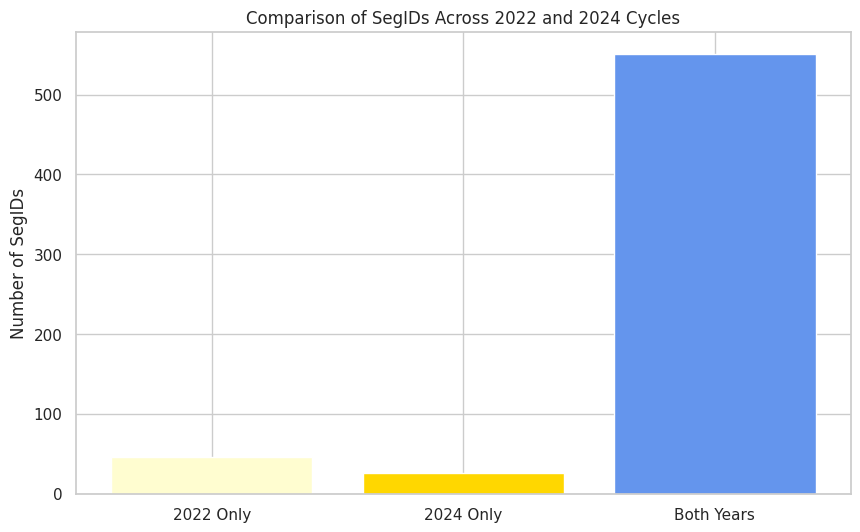

In [ ]:
# Data preparation for visualization
data = {
    '2022 Only': len(unique_to_2022),
    '2024 Only': len(unique_to_2024),
    'Both Years': len(common_seg_ids)
}

# Define a list of blue colors using hex codes for more variety
colors = ['#FFFDD0', '#FFD700', '#6495ed']

# Create a bar chart with custom blue colors
plt.figure(figsize=(10, 6))
plt.bar(data.keys(), data.values(), color=colors)
plt.title('Comparison of SegIDs Across 2022 and 2024 Cycles')
plt.ylabel('Number of SegIDs')
plt.show()


### **5 most frequent impairments per year**

In [ ]:
# Group by 'cycle' and 'impairment', then count occurrences
impairment_counts = df_combined6.groupby(['cycle', 'impairment']).size().reset_index(name='Count')

# Sort the counts within each cycle and get the top 10 impairments
top_impairments_per_cycle = impairment_counts.groupby('cycle').apply(
    lambda x: x.sort_values('Count', ascending=False).head(5)
).reset_index(drop=True)

# Print the results for each cycle
for cycle in top_impairments_per_cycle['cycle'].unique():
    print(f"Top 5 impairments for cycle {cycle}:")
    display(top_impairments_per_cycle[top_impairments_per_cycle['cycle'] == cycle][['impairment', 'Count']])

Top 5 impairments for cycle 2018:


,impairment,Count
0,Bacteria: Indicator Bacteria- E. coli,520
1,Biological: low fish & invert IBIs- cause unknown,64
2,Biological: low aquatic macroinvertebrate IBI,60
3,Fish Consumption Advisory: Mercury,59
4,Algal Growth: Chlorophyll a,54


Top 5 impairments for cycle 2020:


,impairment,Count
5,Bacteria: Indicator Bacteria- E. coli,461
6,Biological: low aquatic macroinvertebrate IBI,63
7,Biological: low fish & invert IBIs- cause unknown,63
8,Fish Consumption Advisory: Mercury,61
9,Algal Growth: Chlorophyll a,47


Top 5 impairments for cycle 2022:


,impairment,Count
10,Bacteria: Indicator Bacteria- E. coli,456
11,Fish Consumption Advisory: Mercury,74
12,Biological: low aquatic macroinvertebrate IBI,69
13,Biological: low fish & invert IBIs- cause unknown,64
14,pH,46


Top 5 impairments for cycle 2024:


,impairment,Count
15,Bacteria: Indicator Bacteria- E. coli,454
16,Biological: low aquatic macroinvertebrate IBI,77
17,Fish Consumption Advisory: Mercury,74
18,Biological: low fish & invert IBIs- cause unknown,63
19,Biological: low fish IBI,39


In [ ]:
# Group by 'impairment' and count occurrences across all cycles
total_impairment_counts = df_combined6.groupby('impairment').size().reset_index(name='Count')

# Sort the counts and get the top 5 impairments
top_five_impairments = total_impairment_counts.sort_values('Count', ascending=False).head(5)

# Print the results
print("Top 5 most common impairments from 2018 to 2024:")
top_five_impairments

Top 5 most common impairments from 2018 to 2024:


,impairment,Count
3,Bacteria: Indicator Bacteria- E. coli,1891
7,Biological: low aquatic macroinvertebrate IBI,269
11,Fish Consumption Advisory: Mercury,268
8,Biological: low fish & invert IBIs- cause unknown,254
46,pH,163


#**RIVERS**

###**How many river segments have been detected as impaired per year?**

In [ ]:
# Filter data to include only river type
river_data = df_combined6[df_combined6['type'] == 'River']
# Count unique 'SegID'
unique_river_segments = river_data['SegID'].nunique()
# Print the number of unique river segments
print("Number of unique river segments:")
print(unique_river_segments)

Number of unique river segments:
551


In [ ]:
# Filter data to include only river type
river_data = df_combined6[df_combined6['type'] == 'River']

In [ ]:
# Group by 'cycle' and count unique 'SegID'
unique_river_segments_per_year = river_data.groupby('cycle')['SegID'].nunique().reset_index()


In [ ]:
# Rename columns for clarity
unique_river_segments_per_year.columns = ['Year', 'Unique River Segments Detected as Impaired']


In [ ]:
# Print the results
print("Number of unique river segments detected as impaired per year:")
unique_river_segments_per_year

Number of unique river segments detected as impaired per year:


,Year,Unique River Segments Detected as Impaired
0,2018,521
1,2020,492
2,2022,502
3,2024,482


In [ ]:
# Calculate the average and median of unique SegIDs of River from 2018 to 2024
filtered_river_data = unique_river_segments_per_year[(unique_river_segments_per_year['Year'] >= 2018) & (unique_river_segments_per_year['Year'] <= 2024)]


In [ ]:
average_unique_rivers = filtered_river_data['Unique River Segments Detected as Impaired'].mean()
median_unique_rivers = filtered_river_data['Unique River Segments Detected as Impaired'].median()


In [ ]:
# Print the average and median
print("\nAverage number of unique river segments detected as impaired from 2018 to 2024:", average_unique_rivers)
print("Median number of unique river segments detected as impaired from 2018 to 2024:", median_unique_rivers)


Average number of unique river segments detected as impaired from 2018 to 2024: 499.25
Median number of unique river segments detected as impaired from 2018 to 2024: 497.0


#### **Overlap of river segments between the 2018 and 2022**

In [ ]:
# Overlap of River Segments Between the 2018 and 2022 Cycles
# Filter for river segments in 2018 and 2022
seg_ids_2018 = set(df_combined6[(df_combined6['type'] == 'River') & (df_combined6['cycle'] == 2018)]['SegID'])
seg_ids_2022 = set(df_combined6[(df_combined6['type'] == 'River') & (df_combined6['cycle'] == 2022)]['SegID'])

# Find the intersection of these sets
common_seg_ids = seg_ids_2018.intersection(seg_ids_2022)

# Output the number of overlapping segments
print("Number of river segments overlapping between 2018 and 2022 cycles:", len(common_seg_ids))

Number of river segments overlapping between 2018 and 2022 cycles: 482


#### **Frequency of Detection Across all year**

In [ ]:
#  Frequency of Detection Across All Cycles
# Group by 'SegID' and count the number of unique 'cycle' values for each SegID
segid_cycle_counts = df_combined6[df_combined6['type'] == 'River'].groupby('SegID')['cycle'].nunique().reset_index()

# Count how many SegIDs appear in exactly 1, 2, 3, and 4 cycles
frequency_of_appearance = segid_cycle_counts['cycle'].value_counts().sort_index()

# Output the frequency table
print("Frequency of SegID appearances across cycles:")
print(frequency_of_appearance)

Frequency of SegID appearances across cycles:
cycle
1     45
2     17
3     38
4    451
Name: count, dtype: int64


 #### **Table of River Segments That Appear Only Once**

In [ ]:
# Filter the segments that appear only once
single_appearance_segids = segid_cycle_counts[segid_cycle_counts['cycle'] == 1]['SegID']

# Filter the original DataFrame to get the details of these segments
single_appearance_details = df_combined6[df_combined6['SegID'].isin(single_appearance_segids)]

# Select the necessary columns and drop duplicates in case there are any
single_appearance_final = single_appearance_details[['name', 'SegID', 'cycle']].drop_duplicates()

# Print the final table
print("Details of river segments that appear only once:")
print(single_appearance_final)


Details of river segments that appear only once:
                                                   name  SegID  cycle
290                                         Cedar River    457   2018
363                                          Iowa River    621   2018
364                                          Iowa River    622   2018
365                                          Iowa River    623   2018
370                                          Iowa River    627   2018
400                                          Iowa River    651   2018
405                                       English River    671   2018
412                                         Price Creek    699   2018
416                                   Little Bear Creek    706   2018
422                                         Raven Creek    723   2018
426                               South Fork Iowa River    749   2018
439                                        Tipton Creek    754   2018
440                                      

###**Major impairments in rivers from 2018 to 2022**

In [ ]:
# Filter data for river type
river_data = df_combined6[df_combined6['type'] == 'River']

# Group by 'impairment' and count occurrences across all cycles for rivers
river_impairment_counts = river_data.groupby('impairment').size().reset_index(name='Count')

# Sort the counts and get the top 5 impairments
top_five_river_impairments = river_impairment_counts.sort_values('Count', ascending=False).head(5)

# Print the results
print("Top 5 most common impairments from 2018 to 2024 for rivers:")
top_five_river_impairments

Top 5 most common impairments from 2018 to 2024 for rivers:


,impairment,Count
0,Bacteria: Indicator Bacteria- E. coli,1800
4,Biological: low aquatic macroinvertebrate IBI,269
5,Biological: low fish & invert IBIs- cause unknown,254
8,Fish Consumption Advisory: Mercury,206
6,Biological: low fish IBI,155


### **5 most frequent impairments per year**

In [ ]:
# Filter for river type
river_data = df_combined6[df_combined6['type'] == 'River']

# Group by 'cycle' (year) and 'impairment', then count occurrences
yearly_impairment_counts = river_data.groupby(['cycle', 'impairment']).size().reset_index(name='Count')

In [ ]:
# Function to sort and select the top 5 impairments for each year
def get_top_impairments(data):
    return data.sort_values('Count', ascending=False).head(5)

# Apply the function to get the top 5 impairments for each year
top_five_impairments_by_year = yearly_impairment_counts.groupby('cycle').apply(get_top_impairments).reset_index(drop=True)

In [ ]:
# Print the top 5 impairments for each cycle
for year in top_five_impairments_by_year['cycle'].unique():
    print(f"Top 5 impairments for cycle {year}:")
    print(top_five_impairments_by_year[top_five_impairments_by_year['cycle'] == year][['impairment', 'Count']])

Top 5 impairments for cycle 2018:
                                          impairment  Count
0              Bacteria: Indicator Bacteria- E. coli    489
1  Biological: low fish & invert IBIs- cause unknown     64
2      Biological: low aquatic macroinvertebrate IBI     60
3                 Fish Consumption Advisory: Mercury     45
4                           Biological: low fish IBI     38
Top 5 impairments for cycle 2020:
                                          impairment  Count
5              Bacteria: Indicator Bacteria- E. coli    435
6      Biological: low aquatic macroinvertebrate IBI     63
7  Biological: low fish & invert IBIs- cause unknown     63
8                 Fish Consumption Advisory: Mercury     47
9                           Biological: low fish IBI     39
Top 5 impairments for cycle 2022:
                                           impairment  Count
10              Bacteria: Indicator Bacteria- E. coli    436
11      Biological: low aquatic macroinvertebrate IBI   

###**How many are SegIDs associated with more than one use?**

In [ ]:
# Filter data to include only river type
river_data = df_combined6[df_combined6['type'] == 'River']

In [ ]:
# Group by 'SegID' and count the number of unique 'use' entries
river_segid_use_counts = river_data.groupby('SegID')['use'].nunique().reset_index()


In [ ]:
# Rename the columns for clarity
river_segid_use_counts.columns = ['SegID', 'Unique Use Count']

In [ ]:
# Filter for SegIDs with more than one unique use
multiple_uses_river_segids = river_segid_use_counts[river_segid_use_counts['Unique Use Count'] > 1]


In [ ]:
# Print the number of SegIDs with more than one use
print("Number of river SegIDs with more than one use:", len(multiple_uses_river_segids))



Number of river SegIDs with more than one use: 127


In [ ]:
# Print the list of SegIDs
print("List of river SegIDs with more than one use:")
print(multiple_uses_river_segids)

List of river SegIDs with more than one use:
     SegID  Unique Use Count
3       15                 2
4       16                 2
13      61                 2
14      62                 3
22      88                 2
..     ...               ...
520   6567                 2
525   6574                 2
526   6575                 2
529   6582                 2
533   6588                 2

[127 rows x 2 columns]


In [ ]:
# Print the list of SegIDs
print("List of river SegIDs with more than one use:")
# print(multiple_uses_river_segids)

List of river SegIDs with more than one use:


### **What are the most frequent uses of rivers affected by impairment?**

In [ ]:
# Filter data for river type
river_data = df_combined6[df_combined6['type'] == 'River']

In [ ]:
# Group by 'use' and count occurrences
common_uses = river_data['useDescription'].value_counts()

In [ ]:
# Print the most common uses of impaired rivers
print("Most frequent uses of rivers affected by impairment across all cycles:")
common_uses.head(10)

Most frequent uses of rivers affected by impairment across all cycles:


useDescription
Recreation: Primary contact        1689
Aquatic Life: Warm Water Type 2     627
Aquatic Life: Warm Water Type 1     566
Human Health                        210
Aquatic Life: Cold Water Type 1     151
Recreation: Secondary contact       147
General Use water                    24
Recreation: Children's contact       22
Name: count, dtype: int64

### **What are the top 5 frequent uses of rivers affected by impairment?**

In [ ]:
# Filter for river type
river_data = df_combined6[df_combined6['type'] == 'River']

# Group by 'cycle' (year) and 'impairment', then count occurrences
yearly_impairment_counts = river_data.groupby(['cycle', 'useDescription']).size().reset_index(name='Count')

# Function to sort and select the top 5 impairments for each year
def get_top_impairments(data):
    return data.sort_values('Count', ascending=False).head(5)

# Apply the function to get the top 5 impairments for each year
top_five_impairments_by_year = yearly_impairment_counts.groupby('cycle').apply(get_top_impairments).reset_index(drop=True)

# Print the top 5 impairments for each cycle
for year in top_five_impairments_by_year['cycle'].unique():
    print(f"Top 5 impairments for cycle {year}:")
    print(top_five_impairments_by_year[top_five_impairments_by_year['cycle'] == year][['useDescription', 'Count']])


Top 5 impairments for cycle 2018:
                    useDescription  Count
0      Recreation: Primary contact    465
1  Aquatic Life: Warm Water Type 2    159
2  Aquatic Life: Warm Water Type 1    152
3                     Human Health     46
4  Aquatic Life: Cold Water Type 1     39
Top 5 impairments for cycle 2020:
                    useDescription  Count
5      Recreation: Primary contact    405
6  Aquatic Life: Warm Water Type 2    159
7  Aquatic Life: Warm Water Type 1    150
8                     Human Health     48
9    Recreation: Secondary contact     38
Top 5 impairments for cycle 2022:
                     useDescription  Count
10      Recreation: Primary contact    410
11  Aquatic Life: Warm Water Type 2    159
12  Aquatic Life: Warm Water Type 1    152
13                     Human Health     58
14  Aquatic Life: Cold Water Type 1     38
Top 5 impairments for cycle 2024:
                     useDescription  Count
15      Recreation: Primary contact    409
16  Aquatic Life

###**tmdlPriority**

In [ ]:
# Filter data for river type
river_data = df_combined6[df_combined6['type'] == 'River']

# Group by 'cycle' (year), 'SegID' and count the number of unique 'tmdlPriority' entries
river_year_segid_tmdl_counts = river_data.groupby(['cycle', 'SegID'])['tmdlPriority'].nunique().reset_index()

# Rename the columns for clarity
river_year_segid_tmdl_counts.columns = ['Year', 'SegID', 'Unique TMDL Priority Count']


In [ ]:
# Filter for SegIDs with more than one unique tmdlPriority in any given year
multiple_tmdl_river_segids_by_year = river_year_segid_tmdl_counts[river_year_segid_tmdl_counts['Unique TMDL Priority Count'] > 1]

# Check if there are any river SegIDs with more than one tmdlPriority by year
if not multiple_tmdl_river_segids_by_year.empty:
    print("There are river SegIDs with more than one TMDL Priority by year:")
    print(multiple_tmdl_river_segids_by_year)
else:
    print("No river SegIDs have more than one TMDL Priority by year.")

There are river SegIDs with more than one TMDL Priority by year:
      Year  SegID  Unique TMDL Priority Count
20    2018     88                           2
21    2018     90                           2
23    2018    103                           2
27    2018    121                           2
31    2018    125                           2
...    ...    ...                         ...
1865  2024   1578                           2
1867  2024   1581                           2
1873  2024   1620                           2
1874  2024   1626                           2
1878  2024   1673                           2

[294 rows x 3 columns]


In [ ]:
# Filter data to include only river type
river_data = df_combined6[df_combined6['type'] == 'River']

# Group by 'cycle' (year) and 'useDescription', then count occurrences
uses_by_year = river_data.groupby(['cycle', 'descriptionTmdl']).size().reset_index(name='Count')


In [ ]:
# Sort the counts within each cycle and get the top useDescriptions
top_uses_by_year = uses_by_year.groupby('cycle').apply(
    lambda x: x.sort_values('Count', ascending=False).head(1)  # Adjust here for more top uses if needed
).reset_index(drop=True)

In [ ]:
# Print the top useDescriptions for each year
print("Top useDescription of rivers affected by impairment by year:")
top_uses_by_year[['cycle', 'descriptionTmdl', 'Count']]

Top useDescription of rivers affected by impairment by year:


,cycle,descriptionTmdl,Count
0,2018,Low social impact and relatively low complexity,493
1,2020,Low social impact and relatively low complexity,438
2,2022,Low social impact and relatively low complexity,436
3,2024,Low social impact and relatively low complexity,433


###**How many unique SegIDs are associated with each name? Top ten**

In [ ]:
# Group by 'name' and count unique 'SegID'
name_segid_counts = df_combined6.groupby('name')['SegID'].nunique().reset_index()


In [ ]:
# Rename the columns for clarity
name_segid_counts.columns = ['Name', 'Unique SegID Count']

In [ ]:
# Sort the results by 'Unique SegID Count' and get the top ten
top_ten_names = name_segid_counts.sort_values(by='Unique SegID Count', ascending=False).head(10)


In [ ]:
# Print the top ten names with the most unique SegIDs
print("Top ten names with the most unique SegIDs:")
top_ten_names

Top ten names with the most unique SegIDs:


,Name,Unique SegID Count
145,Iowa River,19
76,Des Moines River,14
52,Cedar River,11
387,Upper Iowa River,10
393,Wapsipinicon River,9
10,Bear Creek,8
212,Mississippi River,8
11,Beaver Creek,8
175,Little Sioux River,7
213,Missouri River,7


### **Iowa River**

###**How many unique river segments have been declared impaird per year?**

In [ ]:
# Filter data for the Iowa River
iowa_river_data = df_combined6[df_combined6['name'] == 'Iowa River']


In [ ]:
# Group by 'cycle' and count unique 'SegID'
unique_segids_per_cycle_iowa_river = iowa_river_data.groupby('cycle')['SegID'].nunique().reset_index()


In [ ]:
# Rename the columns for clarity
unique_segids_per_cycle_iowa_river.columns = ['Cycle', 'Unique SegID Count']

In [ ]:
# Print the unique SegIDs per cycle for the Iowa River
print("Unique SegIDs per cycle for the Iowa River:")
unique_segids_per_cycle_iowa_river

Unique SegIDs per cycle for the Iowa River:


,Cycle,Unique SegID Count
0,2018,19
1,2020,14
2,2022,14
3,2024,14


###**Most common impairments by year**

In [ ]:
# Filter data for the Iowa River
iowa_river_data = df_combined6[df_combined6['name'] == 'Iowa River']


In [ ]:
# Group by 'cycle' and 'impairment', then count occurrences
impairment_counts_by_cycle = iowa_river_data.groupby(['cycle', 'impairment']).size().reset_index(name='Count')

In [ ]:
# Function to sort and select the top impairments for each year
def get_top_impairments(data):
    return data.sort_values('Count', ascending=False).head(10)

# Apply the function to get the top impairments for each year
top_impairments_by_year = impairment_counts_by_cycle.groupby('cycle').apply(get_top_impairments).reset_index(drop=True)


In [ ]:
# Print the top impairments for each year
print("Top impairments for the Iowa River by year:")
print(top_impairments_by_year)

Top impairments for the Iowa River by year:
    cycle                                 impairment  Count
0    2018         Fish Consumption Advisory: Mercury     18
1    2018      Bacteria: Indicator Bacteria- E. coli     15
2    2018  Biological: loss of native mussel species      2
3    2020         Fish Consumption Advisory: Mercury     18
4    2020      Bacteria: Indicator Bacteria- E. coli      2
5    2020  Biological: loss of native mussel species      2
6    2022         Fish Consumption Advisory: Mercury     18
7    2022      Bacteria: Indicator Bacteria- E. coli      2
8    2022  Biological: loss of native mussel species      2
9    2024         Fish Consumption Advisory: Mercury     18
10   2024      Bacteria: Indicator Bacteria- E. coli      3
11   2024  Biological: loss of native mussel species      2


In [ ]:
data = {
    'cycle': [2018, 2018, 2018, 2020, 2020, 2020, 2022, 2022, 2022, 2024, 2024, 2024],
    'impairment': [
        "Fish Consumption Advisory: Mercury",
        "Bacteria: Indicator Bacteria- E. coli",
        "Biological: loss of native mussel species",
        "Fish Consumption Advisory: Mercury",
        "Bacteria: Indicator Bacteria- E. coli",
        "Biological: loss of native mussel species",
        "Fish Consumption Advisory: Mercury",
        "Bacteria: Indicator Bacteria- E. coli",
        "Biological: loss of native mussel species",
        "Fish Consumption Advisory: Mercury",
        "Bacteria: Indicator Bacteria- E. coli",
        "Biological: loss of native mussel species"
    ],
    'Count': [18, 15, 2, 18, 2, 2, 18, 2, 2, 18, 3, 2]
}
df = pd.DataFrame(data)

# Pivot the DataFrame to have years as rows and impairments as columns with their counts as values
pivot_table = df.pivot(index='cycle', columns='impairment', values='Count').fillna(0)


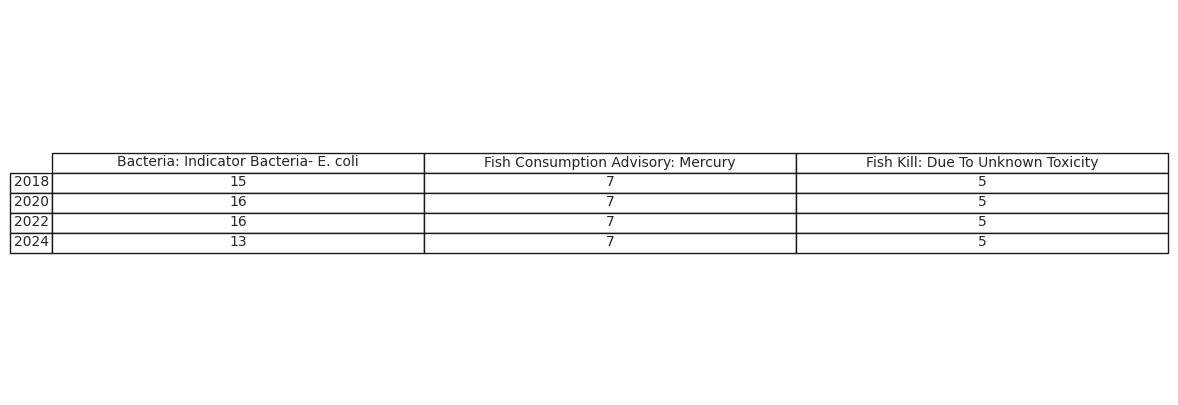

In [ ]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(12, 5))

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table and add it to the plot
table = ax.table(cellText=pivot_table.values, colLabels=pivot_table.columns, rowLabels=pivot_table.index, loc='center', cellLoc='center')

# Adjust font and scale
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

###**What are the most common uses of the river?**

In [ ]:
# Filter data for the Iowa River
iowa_river_data = df_combined6[(df_combined6['name'] == 'Iowa River') & (df_combined6['type'] == 'River')]

# Group by 'cycle' and 'useDescription', then count occurrences
uses_by_year = iowa_river_data.groupby(['cycle', 'useDescription']).size().reset_index(name='Count')

In [ ]:
# Sort the counts within each cycle and get the top use
top_use_by_year = uses_by_year.groupby('cycle').apply(
    lambda x: x.sort_values('Count', ascending=False).head(2)
).reset_index(drop=True)

In [ ]:
# Print the top uses for each year
print("Top use of the Iowa River by year:")
print(top_use_by_year[['cycle', 'useDescription', 'Count']])

Top use of the Iowa River by year:
   cycle                   useDescription  Count
0   2018                     Human Health     18
1   2018      Recreation: Primary contact     15
2   2020                     Human Health     18
3   2020  Aquatic Life: Warm Water Type 1      2
4   2022                     Human Health     18
5   2022  Aquatic Life: Warm Water Type 1      2
6   2024                     Human Health     18
7   2024      Recreation: Primary contact      3


###**Des Moines River**

###**How many unique river segments have been declared impaird per year?**

In [ ]:
# Filter data for the Des Moines River
DesMoines = df_combined6[df_combined6['name'] == 'Des Moines River']

# Group by 'cycle' and count unique 'SegID'
unique_segids_per_cycle_iowa_river = DesMoines.groupby('cycle')['SegID'].nunique().reset_index()

# Rename the columns for clarity
unique_segids_per_cycle_iowa_river.columns = ['Cycle', 'Unique SegID Count']

# Print the unique SegIDs per cycle for the Des Moines River
print("Unique SegIDs per cycle for the Des Moines River:")
unique_segids_per_cycle_iowa_river


Unique SegIDs per cycle for the Des Moines River:


,Cycle,Unique SegID Count
0,2018,14
1,2020,14
2,2022,14
3,2024,13


###**Most common impairments by year**

In [ ]:
# Filter data for the Des Moines River
Des_Moines = df_combined6[df_combined6['name'] == 'Des Moines River']

# Group by 'cycle' and 'impairment', then count occurrences
impairment_counts_by_cycle = Des_Moines.groupby(['cycle', 'impairment']).size().reset_index(name='Count')

# Function to sort and select the top impairments for each year
def get_top_impairments(data):
    return data.sort_values('Count', ascending=False).head()  # Adjust the head() parameter as needed for more or fewer top results

# Apply the function to get the top impairments for each year
top_impairments_by_year = impairment_counts_by_cycle.groupby('cycle').apply(get_top_impairments).reset_index(drop=True)

# Print the top impairments for each year
print("Top impairments for the Des Moines River by year:")
print(top_impairments_by_year)


Top impairments for the Des Moines River by year:
    cycle                             impairment  Count
0    2018  Bacteria: Indicator Bacteria- E. coli     15
1    2018     Fish Consumption Advisory: Mercury      7
2    2018     Fish Kill: Due To Unknown Toxicity      5
3    2020  Bacteria: Indicator Bacteria- E. coli     16
4    2020     Fish Consumption Advisory: Mercury      7
5    2020     Fish Kill: Due To Unknown Toxicity      5
6    2022  Bacteria: Indicator Bacteria- E. coli     16
7    2022     Fish Consumption Advisory: Mercury      7
8    2022     Fish Kill: Due To Unknown Toxicity      5
9    2024  Bacteria: Indicator Bacteria- E. coli     13
10   2024     Fish Consumption Advisory: Mercury      7
11   2024     Fish Kill: Due To Unknown Toxicity      5


In [ ]:
# Create a DataFrame from the provided data
data = {
    'cycle': [2018, 2018, 2018, 2020, 2020, 2020, 2022, 2022, 2022, 2024, 2024, 2024],
    'impairment': [
        "Bacteria: Indicator Bacteria- E. coli",
        "Fish Consumption Advisory: Mercury",
        "Fish Kill: Due To Unknown Toxicity",
        "Bacteria: Indicator Bacteria- E. coli",
        "Fish Consumption Advisory: Mercury",
        "Fish Kill: Due To Unknown Toxicity",
        "Bacteria: Indicator Bacteria- E. coli",
        "Fish Consumption Advisory: Mercury",
        "Fish Kill: Due To Unknown Toxicity",
        "Bacteria: Indicator Bacteria- E. coli",
        "Fish Consumption Advisory: Mercury",
        "Fish Kill: Due To Unknown Toxicity"
    ],
    'Count': [15, 7, 5, 16, 7, 5, 16, 7, 5, 13, 7, 5]
}
df = pd.DataFrame(data)

# Pivot the DataFrame to have years as rows and impairments as columns with their counts as values
pivot_table = df.pivot(index='cycle', columns='impairment', values='Count').fillna(0)

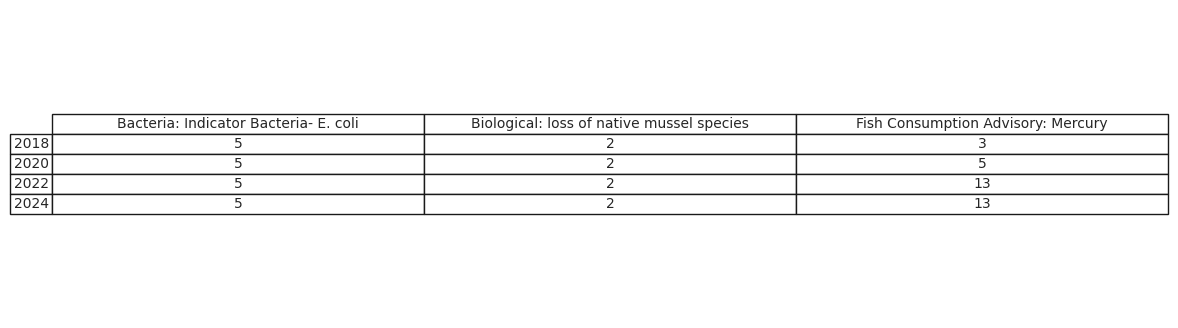

In [ ]:
# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(12, 4))

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table and add it to the plot
table = ax.table(cellText=pivot_table.values, colLabels=pivot_table.columns, rowLabels=pivot_table.index, loc='center', cellLoc='center')

# Adjust font and scale
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

###**What are the most common uses of the river?**

In [ ]:
# Filter data for the Des Moines River
DesMoines = df_combined6[(df_combined6['name'] == 'Des Moines River') & (df_combined6['type'] == 'River')]

# Group by 'cycle' and 'useDescription', then count occurrences
uses_by_year = DesMoines.groupby(['cycle', 'useDescription']).size().reset_index(name='Count')

# Sort the counts within each cycle and get the top use
top_use_by_year = uses_by_year.groupby('cycle').apply(
    lambda x: x.sort_values('Count', ascending=False).head(2)
).reset_index(drop=True)

# Print the top uses for each year
print("Top use of the Des Moines River by year:")
print(top_use_by_year[['cycle', 'useDescription', 'Count']])



Top use of the Des Moines River by year:
   cycle               useDescription  Count
0   2018  Recreation: Primary contact     15
1   2018                 Human Health      7
2   2020  Recreation: Primary contact     16
3   2020                 Human Health      7
4   2022  Recreation: Primary contact     16
5   2022                 Human Health      7
6   2024  Recreation: Primary contact     13
7   2024                 Human Health      7


###**Upper Iowa River**

###**How many unique river segments have been declared impaird per year?**

In [ ]:
# Filter data for the Upper Iowa River
UpperIowaRiver = df_combined6[df_combined6['name'] == 'Upper Iowa River']

# Group by 'cycle' and count unique 'SegID'
unique_segids_per_cycle_iowa_river = UpperIowaRiver.groupby('cycle')['SegID'].nunique().reset_index()

# Rename the columns for clarity
unique_segids_per_cycle_iowa_river.columns = ['Cycle', 'Unique SegID Count']

# Print the unique SegIDs per cycle for the Upper Iowa River
print("Unique SegIDs per cycle for the Upper Iowa River:")
unique_segids_per_cycle_iowa_river

Unique SegIDs per cycle for the Upper Iowa River:


,Cycle,Unique SegID Count
0,2018,4
1,2020,5
2,2022,10
3,2024,10


###**Most common impairments by year**

In [ ]:
# Filter data for the Upper Iowa River
UpperIowaRiver = df_combined6[df_combined6['name'] == 'Upper Iowa River']

# Group by 'cycle' and 'impairment', then count occurrences
impairment_counts_by_cycle = UpperIowaRiver.groupby(['cycle', 'impairment']).size().reset_index(name='Count')

# Function to sort and select the top impairments for each year
def get_top_impairments(data):
    return data.sort_values('Count', ascending=False).head(2)

# Apply the function to get the top impairments for each year
top_impairments_by_year = impairment_counts_by_cycle.groupby('cycle').apply(get_top_impairments).reset_index(drop=True)

# Print the top impairments for each year
print("Top impairments for the Upper Iowa River by year:")
print(top_impairments_by_year)

Top impairments for the Upper Iowa River by year:
   cycle                             impairment  Count
0   2018  Bacteria: Indicator Bacteria- E. coli      5
1   2018     Fish Consumption Advisory: Mercury      3
2   2020  Bacteria: Indicator Bacteria- E. coli      5
3   2020     Fish Consumption Advisory: Mercury      5
4   2022     Fish Consumption Advisory: Mercury     13
5   2022  Bacteria: Indicator Bacteria- E. coli      5
6   2024     Fish Consumption Advisory: Mercury     13
7   2024  Bacteria: Indicator Bacteria- E. coli      5


In [ ]:
# Create a DataFrame from the provided data
data = {
    'cycle': [2018, 2018, 2018, 2020, 2020, 2020, 2022, 2022, 2022, 2024, 2024, 2024],
    'impairment': [
        "Bacteria: Indicator Bacteria- E. coli",
        "Fish Consumption Advisory: Mercury",
        "Biological: loss of native mussel species",
        "Bacteria: Indicator Bacteria- E. coli",
        "Fish Consumption Advisory: Mercury",
        "Biological: loss of native mussel species",
        "Fish Consumption Advisory: Mercury",
        "Bacteria: Indicator Bacteria- E. coli",
        "Biological: loss of native mussel species",
        "Fish Consumption Advisory: Mercury",
        "Bacteria: Indicator Bacteria- E. coli",
        "Biological: loss of native mussel species"
    ],
    'Count': [5, 3, 2, 5, 5, 2, 13, 5, 2, 13, 5, 2]
}
df = pd.DataFrame(data)

# Pivot the DataFrame to have years as rows and impairments as columns with their counts as values
pivot_table = df.pivot(index='cycle', columns='impairment', values='Count').fillna(0)

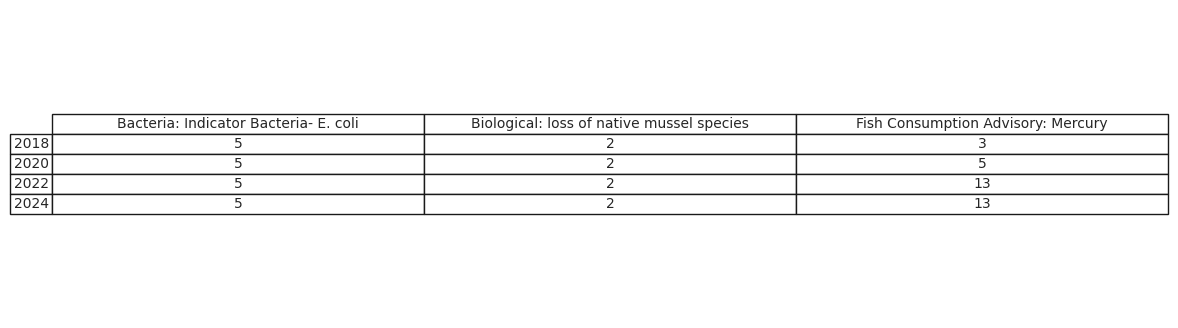

In [ ]:

# Create a figure and a subplot
fig, ax = plt.subplots(figsize=(12, 4))  # Adjust size as needed

# Hide the axes
ax.axis('tight')
ax.axis('off')

# Create the table and add it to the plot
table = ax.table(cellText=pivot_table.values, colLabels=pivot_table.columns, rowLabels=pivot_table.index, loc='center', cellLoc='center')

# Adjust font and scale
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

plt.show()

###**What are the most common uses of the river?**

In [ ]:
# Filter data for the Upper Iowa River
UpperIowaRiver = df_combined6[(df_combined6['name'] == 'Upper Iowa River') & (df_combined6['type'] == 'River')]

# Group by 'cycle' and 'useDescription', then count occurrences
uses_by_year = UpperIowaRiver.groupby(['cycle', 'useDescription']).size().reset_index(name='Count')

# Sort the counts within each cycle and get the top use
top_use_by_year = uses_by_year.groupby('cycle').apply(
    lambda x: x.sort_values('Count', ascending=False).head(2)  # Adjust the head() parameter as needed for more or fewer top results
).reset_index(drop=True)

# Print the top uses for each year
print("Top use of the Upper Iowa River by year:")
print(top_use_by_year[['cycle', 'useDescription', 'Count']])


Top use of the Upper Iowa River by year:
   cycle               useDescription  Count
0   2018  Recreation: Primary contact      5
1   2018                 Human Health      3
2   2020                 Human Health      5
3   2020  Recreation: Primary contact      5
4   2022                 Human Health     13
5   2022  Recreation: Primary contact      5
6   2024                 Human Health     13
7   2024  Recreation: Primary contact      5


#**Lakes**

In [ ]:
# Filter data to include only river type
river_data = df_combined6[df_combined6['type'] == 'Lake']
# Count unique 'SegID'
unique_river_segments = river_data['SegID'].nunique()
# Print the number of unique river segments
print("Number of unique river segments:")
print(unique_river_segments)


Number of unique river segments:
120


In [ ]:
# Filter data to include only Lake type
Lake_data = df_combined6[df_combined6['type'] == 'Lake']

In [ ]:
# Group by 'cycle' and count unique 'SegID'
unique_Lake_segments_per_year = Lake_data.groupby('cycle')['SegID'].nunique().reset_index()

In [ ]:
# Rename columns for clarity
unique_Lake_segments_per_year.columns = ['Year', 'Unique Lake Segments Detected as Impaired']

In [ ]:
# Rename columns for clarity
unique_Lake_segments_per_year.columns = ['Year', 'Unique Lake Segments Detected as Impaired']

In [ ]:
# Print the results
print("Number of unique Lake segments detected as impaired per year:")
unique_Lake_segments_per_year

Number of unique Lake segments detected as impaired per year:


,Year,Unique Lake Segments Detected as Impaired
0,2018,92
1,2020,88
2,2022,88
3,2024,89


### **Overlap of River Segments Between the 2020 and 2022**

In [ ]:
# Filter for Lake segments in 2020 and 2022
seg_ids_2020 = set(df_combined6[(df_combined6['type'] == 'Lake') & (df_combined6['cycle'] == 2020)]['SegID'])
seg_ids_2022 = set(df_combined6[(df_combined6['type'] == 'Lake') & (df_combined6['cycle'] == 2022)]['SegID'])

# Find the intersection of these sets
common_seg_ids = seg_ids_2020.intersection(seg_ids_2022)

# Output the number of overlapping segments
print("Number of Lake segments overlapping between 2020 and 2022 cycles:", len(common_seg_ids))


Number of Lake segments overlapping between 2020 and 2022 cycles: 78


### **Frequency of Detection Across All Cycles**

In [ ]:
# Group by 'SegID' and count the number of unique 'cycle' values for each SegID
segid_cycle_counts = df_combined6[df_combined6['type'] == 'Lake'].groupby('SegID')['cycle'].nunique().reset_index()

# Count how many SegIDs appear in exactly 1, 2, 3, and 4 cycles
frequency_of_appearance = segid_cycle_counts['cycle'].value_counts().sort_index()

# Output the frequency table
print("Frequency of SegID appearances across cycles:")
print(frequency_of_appearance)


Frequency of SegID appearances across cycles:
cycle
1    22
2    18
3    21
4    59
Name: count, dtype: int64


### **Table of Lake Segments That Appear Only Once**

In [ ]:
# Filter the segments that appear only once
single_appearance_segids = segid_cycle_counts[segid_cycle_counts['cycle'] == 1]['SegID']

# Filter the original DataFrame to get the details of these segments
single_appearance_details = df_combined6[df_combined6['SegID'].isin(single_appearance_segids)]

# Select the necessary columns and drop duplicates in case there are any
single_appearance_final = single_appearance_details[['name', 'SegID', 'cycle']].drop_duplicates()

# Print the final table
print("Details of lake segments that appear only once:")
print(single_appearance_final)


Details of lake segments that appear only once:
                            name  SegID  cycle
294          Pleasant Creek Lake    459   2018
606              North Twin Lake   1167   2018
656            Don Williams Lake   1249   2018
736                  Viking Lake   1407   2018
840              Big Spirit Lake   1655   2018
883    Avenue Of The Saints Lake   1790   2018
2500                 Hannen Lake    704   2022
2906                 Silver Lake   1669   2022
3499            Otter Creek Lake    720   2024
3513              East Twin Lake    777   2024
3518                  Eagle Lake    779   2024
3549        Fin And Feather Lake    840   2024
3593                   Iowa Lake    969   2024
3643                 Morris Lake   1071   2024
3650         West Lake (Osceola)   1082   2024
3672           Sunken Grove Lake   1174   2024
3673           Little Clear Lake   1176   2024
3850                 Spring Lake   1569   2024
3863  Crawford Creek Impoundment   1583   2024
3895        

### **5 most frequent impairments from 2018 to 2024**

In [ ]:
# Group by 'cycle' and 'impairment', then count occurrences
impairment_counts = df_combined6.groupby(['cycle', 'impairment']).size().reset_index(name='Count')

# Sort the counts within each cycle and get the top 10 impairments
top_impairments_per_cycle = impairment_counts.groupby('cycle').apply(
    lambda x: x.sort_values('Count', ascending=False).head(5)
).reset_index(drop=True)

# Print the results for each cycle
for cycle in top_impairments_per_cycle['cycle'].unique():
    print(f"Top 5 impairments for cycle {cycle}:")
    display(top_impairments_per_cycle[top_impairments_per_cycle['cycle'] == cycle][['impairment', 'Count']])

Top 5 impairments for cycle 2018:


,impairment,Count
0,Bacteria: Indicator Bacteria- E. coli,520
1,Biological: low fish & invert IBIs- cause unknown,64
2,Biological: low aquatic macroinvertebrate IBI,60
3,Fish Consumption Advisory: Mercury,59
4,Algal Growth: Chlorophyll a,54


Top 5 impairments for cycle 2020:


,impairment,Count
5,Bacteria: Indicator Bacteria- E. coli,461
6,Biological: low aquatic macroinvertebrate IBI,63
7,Biological: low fish & invert IBIs- cause unknown,63
8,Fish Consumption Advisory: Mercury,61
9,Algal Growth: Chlorophyll a,47


Top 5 impairments for cycle 2022:


,impairment,Count
10,Bacteria: Indicator Bacteria- E. coli,456
11,Fish Consumption Advisory: Mercury,74
12,Biological: low aquatic macroinvertebrate IBI,69
13,Biological: low fish & invert IBIs- cause unknown,64
14,pH,46


Top 5 impairments for cycle 2024:


,impairment,Count
15,Bacteria: Indicator Bacteria- E. coli,454
16,Biological: low aquatic macroinvertebrate IBI,77
17,Fish Consumption Advisory: Mercury,74
18,Biological: low fish & invert IBIs- cause unknown,63
19,Biological: low fish IBI,39


In [ ]:
# Filter data for river type
river_data = df_combined6[df_combined6['type'] == 'Lake']

# Group by 'impairment' and count occurrences across all cycles for rivers
river_impairment_counts = river_data.groupby('impairment').size().reset_index(name='Count')

# Sort the counts and get the top 5 impairments
top_five_river_impairments = river_impairment_counts.sort_values('Count', ascending=False).head(5)

# Print the results
print("Top 5 most common impairments from 2018 to 2024 for lakes:")
top_five_river_impairments

Top 5 most common impairments from 2018 to 2024 for lakes:


,impairment,Count
0,Algal Growth: Chlorophyll a,153
14,pH,101
2,Bacteria: Indicator Bacteria- E. coli,84
3,Fish Consumption Advisory: Mercury,62
7,Organic Enrichment: Low Dissolved Oxygen,42


In [ ]:
# Filter for lake type
lake_data = df_combined6[df_combined6['type'] == 'Lake']

# Group by 'cycle' (year) and 'impairment', then count occurrences
yearly_lake_impairment_counts = lake_data.groupby(['cycle', 'impairment']).size().reset_index(name='Count')


In [ ]:
# Function to sort and select the top 5 impairments for each year
def get_top_impairments(data):
    return data.sort_values('Count', ascending=False).head(5)

# Apply the function to get the top 5 impairments for each year
top_five_lake_impairments_by_year = yearly_lake_impairment_counts.groupby('cycle').apply(get_top_impairments).reset_index(drop=True)

In [ ]:
# Print the top 5 impairments for each cycle
for year in top_five_lake_impairments_by_year['cycle'].unique():
    print(f"Top 5 impairments for cycle {year}:")
    print(top_five_lake_impairments_by_year[top_five_lake_impairments_by_year['cycle'] == year][['impairment', 'Count']])


Top 5 impairments for cycle 2018:
                              impairment  Count
0            Algal Growth: Chlorophyll a     52
1  Bacteria: Indicator Bacteria- E. coli     30
2                                     pH     20
3     Fish Consumption Advisory: Mercury     14
4                              Turbidity     12
Top 5 impairments for cycle 2020:
                                 impairment  Count
5               Algal Growth: Chlorophyll a     46
6                                        pH     26
7     Bacteria: Indicator Bacteria- E. coli     24
8        Fish Consumption Advisory: Mercury     14
9  Organic Enrichment: Low Dissolved Oxygen     10
Top 5 impairments for cycle 2022:
                               impairment  Count
10                                     pH     28
11            Algal Growth: Chlorophyll a     27
12  Bacteria: Indicator Bacteria- E. coli     18
13     Fish Consumption Advisory: Mercury     17
14    Turbidity: Secchi Disk Transparency     16
Top 5 impa

###**What are the top 5 frequent uses of Lakes affected by impairment?**

In [ ]:
# Filter for lake type
lake_data = df_combined6[df_combined6['type'] == 'Lake']

# Group by 'cycle' (year) and 'impairment', then count occurrences
yearly_impairment_counts = lake_data.groupby(['cycle', 'useDescription']).size().reset_index(name='Count')

# Function to sort and select the top 5 impairments for each year
def get_top_impairments(data):
    return data.sort_values('Count', ascending=False).head(5)

# Apply the function to get the top 5 impairments for each year
top_five_impairments_by_year = yearly_impairment_counts.groupby('cycle').apply(get_top_impairments).reset_index(drop=True)

# Print the top 5 impairments for each cycle
for year in top_five_impairments_by_year['cycle'].unique():
    print(f"Top 5 impairments for cycle {year}:")
    print(top_five_impairments_by_year[top_five_impairments_by_year['cycle'] == year][['useDescription', 'Count']])


Top 5 impairments for cycle 2018:
                     useDescription  Count
0       Recreation: Primary contact     86
1  Aquatic Life: Lakes and wetlands     54
2                      Human Health     16
Top 5 impairments for cycle 2020:
                     useDescription  Count
3       Recreation: Primary contact     78
4  Aquatic Life: Lakes and wetlands     56
5                      Human Health     18
Top 5 impairments for cycle 2022:
                     useDescription  Count
6       Recreation: Primary contact     66
7  Aquatic Life: Lakes and wetlands     55
8                      Human Health     18
9                    Drinking Water      1
Top 5 impairments for cycle 2024:
                      useDescription  Count
10       Recreation: Primary contact     59
11  Aquatic Life: Lakes and wetlands     58
12                      Human Health     19
13                    Drinking Water      2


**descriptionTmdl**

In [ ]:
# Filter data to include only river type
lake = df_combined6[df_combined6['type'] == 'Lake']

# Group by 'cycle' (year) and 'descriptionTmdl', then count occurrences
uses_by_year = lake.groupby(['cycle', 'descriptionTmdl']).size().reset_index(name='Count')

In [ ]:
# Sort the counts within each cycle and get the top useDescriptions
top_uses_by_year = uses_by_year.groupby('cycle').apply(
    lambda x: x.sort_values('Count', ascending=False).head(2)
).reset_index(drop=True)

In [ ]:
# Print the top descriptionTmdls for each year
print("Top descriptionTmdl of lake affected by impairment by year:")
top_uses_by_year[['cycle', 'descriptionTmdl', 'Count']]

Top descriptionTmdl of lake affected by impairment by year:


,cycle,descriptionTmdl,Count
0,2018,Low social impact and relatively high complexity,78
1,2018,High social impact and relatively low complexity,48
2,2020,Low social impact and relatively high complexity,79
3,2020,High social impact and relatively low complexity,48
4,2022,Low social impact and relatively high complexity,76
5,2022,High social impact and relatively low complexity,46
6,2024,Low social impact and relatively high complexity,79
7,2024,High social impact and relatively high complexity,35


###**Which lakes have more deteriorated segments?**

In [ ]:
# Filter data to include only lake type
lake_data = df_combined6[df_combined6['type'] == 'Lake']

# Group by 'name' and count unique 'SegID'
lake_segids_counts = lake_data.groupby('name')['SegID'].nunique().reset_index()

# Rename the columns for clarity
lake_segids_counts.columns = ['Lake Name', 'Unique SegID Count']

In [ ]:
# Sort the results by 'Unique SegID Count' and get the top ten
top_ten_lakes = lake_segids_counts.sort_values(by='Unique SegID Count', ascending=False).head(10)

In [ ]:
# Print the top ten lakes with the most unique SegIDs
print("Top ten lakes with the most unique SegIDs:")
print(top_ten_lakes)

Top ten lakes with the most unique SegIDs:
               Lake Name  Unique SegID Count
94           Silver Lake                   3
104            Swan Lake                   2
46             Iowa Lake                   2
0         Arrowhead Pond                   1
73      Minnewashta Lake                   1
84         Pleasant Lake                   1
83   Pleasant Creek Lake                   1
82         Pickerel Lake                   1
81      Otter Creek Lake                   1
80       North Twin Lake                   1
